#  Aula 5 - Regressão (Desafio)

**Objetivo:** 
*   Aprofundarmos no estudo de o que é um modelo de Regressão Linear, suas aplicações, funcionalidades e variações. 

**O que você será capaz de fazer após a aula:**
* Implementar e interpretar passo a passo um algoritmo de Regressão Linear.

## Dataset House Prices
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

Suponha que você é o cientista de dados da sua empresa e sua tarefa é construir um modelo de preços de imóveis na Califórnia usando os dados do censo deste estado.

Esses dados possuem características como renda média, idade média da casa, nº da quantidade de quartos e cômodos, quantidade média de moradores, latitude e longitude e população para cada grupo ("blocks"/distritos) de quarteirões na Califórnia totalizando informações de 20640 blocos.

Seu modelo deve aprender com esses dados e ser capaz de prever o preço médio da habitação em qualquer distrito, considerando todas as outras métricas.

## Passo 1 - Qual o problema? 

- Primeiro, se pergunte: Qual é o objetivo de negócio deste mdelo? Como a empresa espera usar e se beneficiar dele? **Seu objetivo final não é apenas construir o modelo!**
- Responder às perguntas acima o ajudará a decidir quais algoritmos você selecionará, qual medida de desempenho você usará para avaliar seu modelo e quanto esforço você deve gastar para ajustá-lo.
<br />

Suponha que a as perguntas foram dadas pelo seu chefe onde ele informa que a saída do seu modelo (previsão do preço médio da habitação de um distrito) será alimentada para outro sistema de aprendizado de máquina junto com muitos outros sinais. Esse sistema downstream determinará se vale a pena investir em determinada área ou não. **Acertar isso é fundamental, pois afeta diretamente a receita!**

Esta tarefa parece ser um problema de *Regressão Múltipla*.

## Passo 2 - Carregando/Importando os dados 

In [48]:
from sklearn.datasets import fetch_california_housing

casa = fetch_california_housing(as_frame=True)

print(casa.DESCR)
#casa.frame.head()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [49]:
casa.data.head() # essas são as variáveis explicativas
#casa.target.head() # essa é a variável target
#casa.frame.info()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [50]:
import pandas as pd

# Transformando o Dataset em um dataframe para que fique mais fácil de trabalhar
df = pd.DataFrame(casa.data, columns = casa.feature_names) # Dando os nomes as colunas 
df['MedHouseVal'] = casa.target # Unindo a variável target ao dataset
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Passo 3 - Analisando os dados (Descritiva)

Trabalhar com atributos pré-processados (que não é coletado através de um questionário ou a base é montada por você, estes dados já estão em algum documneto ou na internet) ​​costuma ser comum em Machine Learning. 
Obtê-los não é necessariamente um problema, mas você deve tentar entender como os dados foram calculados!

In [62]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [53]:
# Use este espaço para realizar as análises descritivas que você 
# julgar relevantes para este banco de dados.
# Elabore histogramas, faça medidas-resumo, explore correlações e
# tente identificar novas variáveis mais úteis que possam ser adicionadas 
# com base nas variáveis já existentes no banco.  Usar o describe


import numpy as np
from numpy import mean

vars_numericas = [feature for feature in df.columns if df[feature].dtypes!="O"]
vars_numericas

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

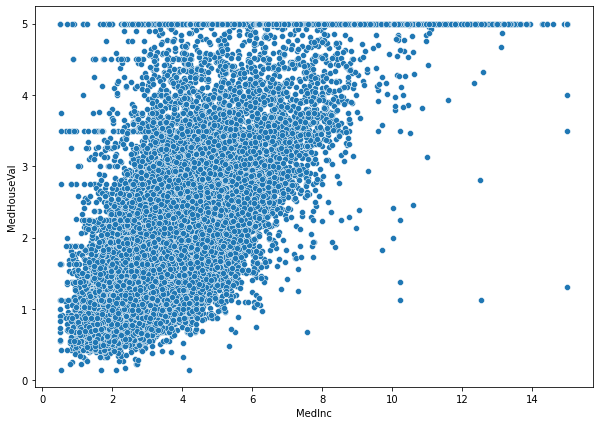

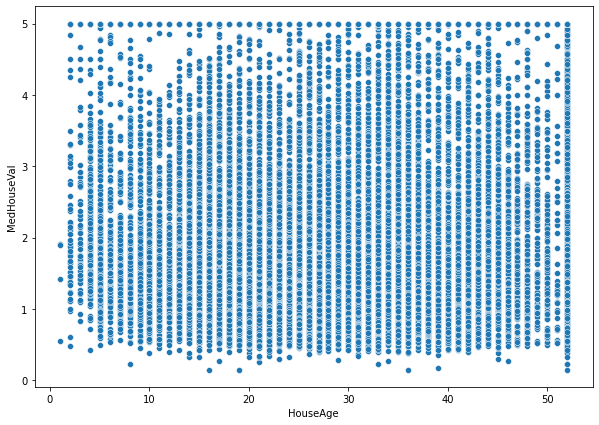

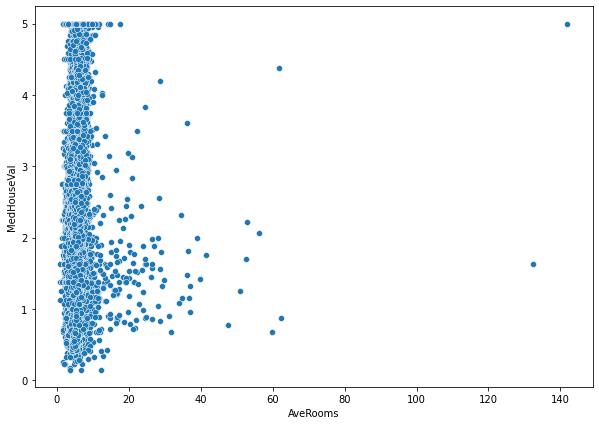

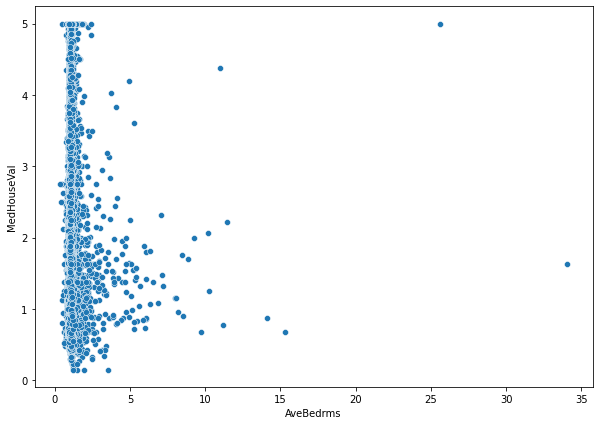

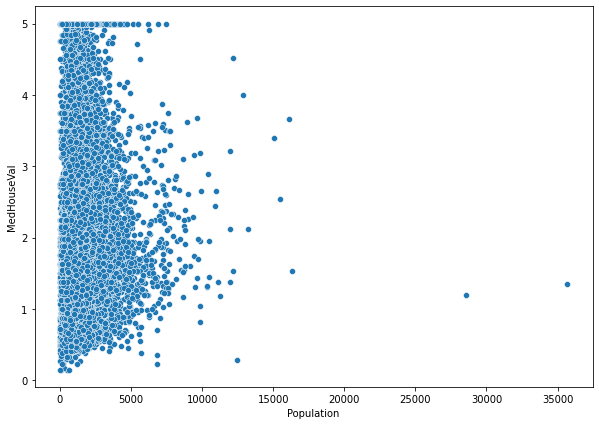

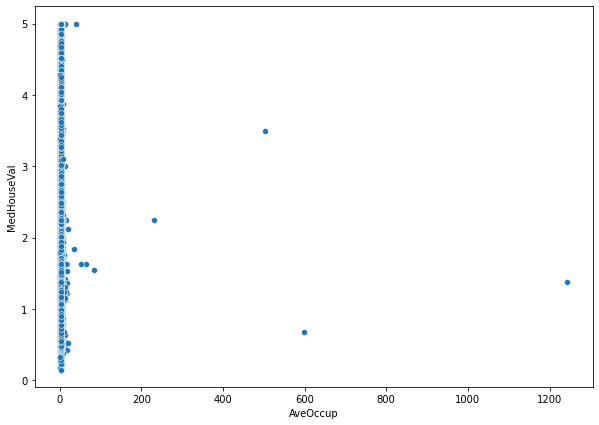

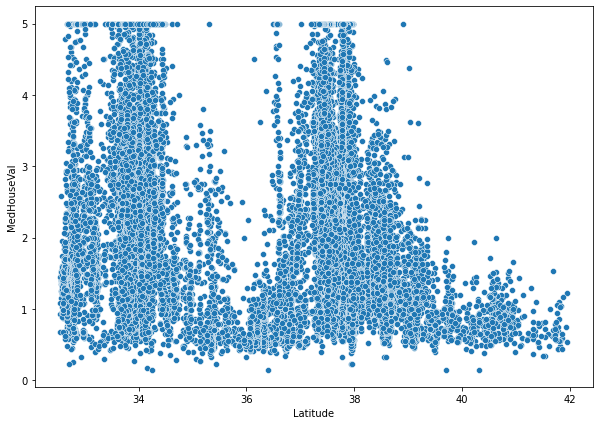

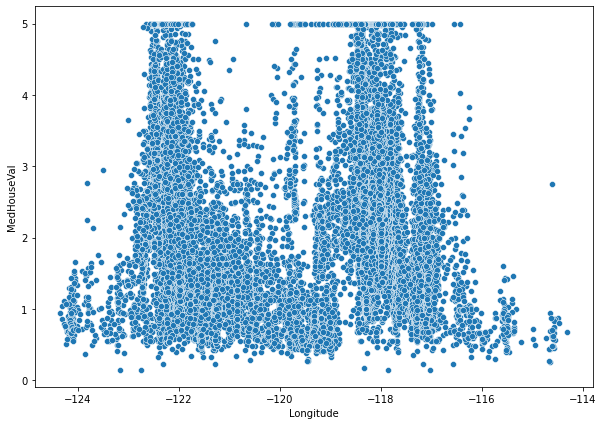

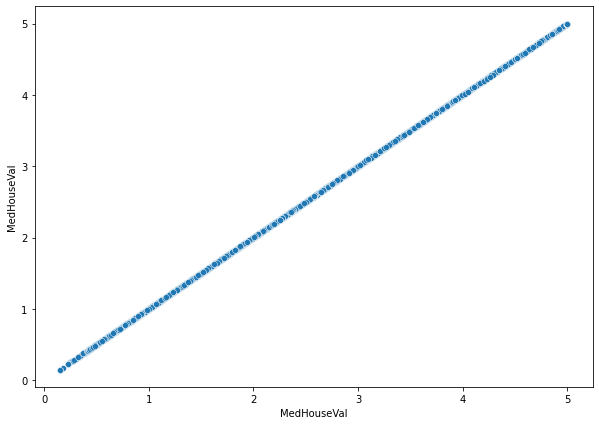

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in vars_numericas:
   sns.scatterplot(x = df[feature], y = df['MedHouseVal'])
   
   plt.show()

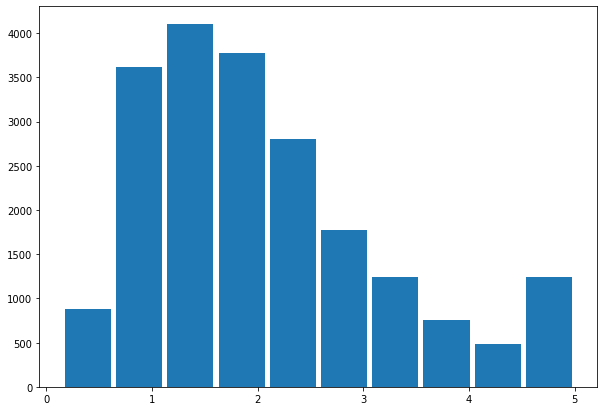

In [56]:
import matplotlib.pyplot as plt

plt.hist(df['MedHouseVal'], 10, rwidth=0.9)
plt.show()

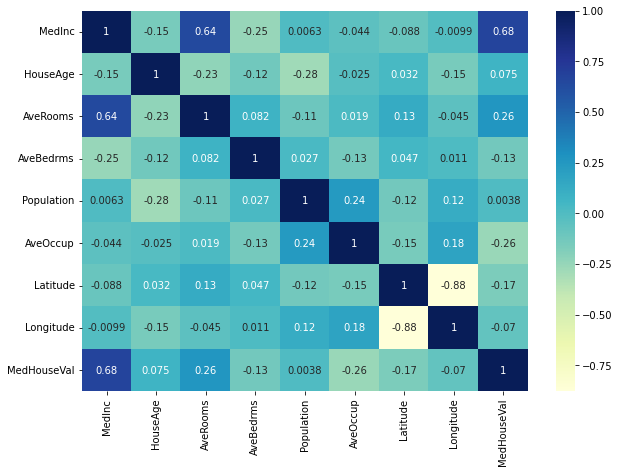

In [58]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(df.corr('spearman'),
                      cmap = 'YlGnBu',
                      annot = True)

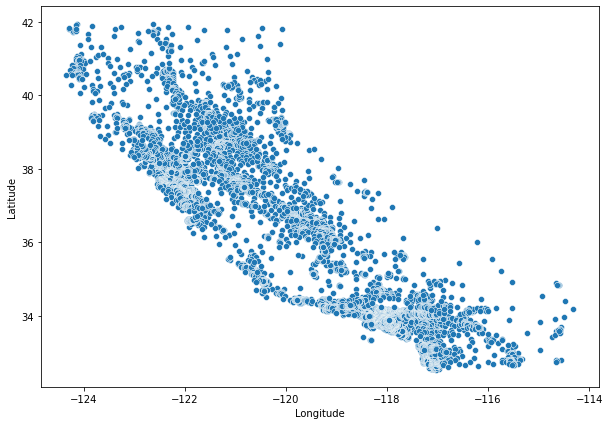

In [96]:
sns.scatterplot(data=df, x="Longitude", y="Latitude",
               
                #hue= 'region',
                #style = 'sex',
                #size = 'married'
                );


#sns.scatterplot(data=tips, x="total_bill", y="tip");   

In [59]:
df1 = df.drop(['Latitude','Longitude'], axis = 1)

## Passo 4 - Divisão

In [84]:
# Utilize este espaço para dividir o conjunto de dados em um conjunto de treinamento e um conjunto de teste. 
# Lembre-se que, para fazer isso, é necessário distinguir o valor que o algoritmo deve adivinhar (y) 
# e os valores que devem ser dados ao algoritmo (x).
# Em seguida, construa o modelo. Como você interpreta os coeficientes do modelo?

from sklearn.model_selection import train_test_split

x=df.drop(['MedHouseVal'], axis=1)
y=df['MedHouseVal']

#x = df.iloc[:,2:7] # outra maneira de dizer p/ o Pyhton pegar a 2ª e 3ª coluna (contador começa na coluna 0)
#y = df[:,8] # outra maneira de dizer p/ o Pyhton pegar a 4ª coluna (contador começa na coluna 0)
#x_sklearn.head()

xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
import statsmodels.api as sm

xtreino = sm.add_constant(xtreino) # add uma constante para que possamos estimar o valor do intercepto (beta0)

modelo = sm.OLS(ytreino, xtreino).fit() #modelo e seu ajuste

resultados = modelo.summary()
print(resultados)

In [87]:
x=df1.drop(['MedHouseVal'], axis=1)
y=df1['MedHouseVal']

#x = df.iloc[:,2:7] # outra maneira de dizer p/ o Pyhton pegar a 2ª e 3ª coluna (contador começa na coluna 0)
#y = df[:,8] # outra maneira de dizer p/ o Pyhton pegar a 4ª coluna (contador começa na coluna 0)
#x_sklearn.head()

xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
import statsmodels.api as sm

xtreino = sm.add_constant(xtreino) # add uma constante para que possamos estimar o valor do intercepto (beta0)

modelo = sm.OLS(ytreino, xtreino).fit() #modelo e seu ajuste

resultados = modelo.summary()
print(resultados)



Encontramos dois valores de R2 que foram '0.609' e '0.542', ou seja, aproximadamente '0,61' ou 60% e '0,54' ou 54% da amostra que foi representada pelos dois modelos proposto.

Estaremos utilizando o 1° modelo, pois o mesmo apresenta um maior R2 ajustado visto que representa uma maior representatividade da amostra, todavia o baixo valor de representatividade pode indicar que o modelo de Regressão Linear não é o mais indicado para executar as prveisões indicadas.

* Intercepto: é o valor previsto de uma variável dependente = -37.0562;
* x1 a x8: são as variáveis independentes;
* β1 a β8: são os coeficientes de regressão respectivamente = 8.3252, 52.0, 6.238137, 1.073446, 496.0, 2.109842, 37.88, -122.23.


## Passo 5 - Previsão

Vamos supor que quermos prever MedInc considerando os dados de entrada:

* MedInc = 0.8.3252 (ou seja,  x1  = 8.3252)
* HouseAge = 52.0 (ou seja,  x2  = 52.0)
* AveRooms = 6.238137 (ou seja,  x3  = 6.238137)
* AveBedrms = 1.073446 (ou seja,  x4  = 1.073446)
* Population = 496 (ou seja,  x5  = 496)
* AveOccup = 2.109842 (ou seja,  x6  = 2.109842)
* Latitude = 37.88 (ou seja,  x7  = 37.88)
* Longitude = -122.23 (ou seja,  x8  = -122.23)


In [89]:
# Utilize este espaço para realizar suas predições. 
# Como você interpreta os valores encontrados por ela?

x_new1 = [1, 8.3252, 52, 6.238137, 1.073446	, 496, 2.109842, 37.88, -122.23] # como a reg. foi feita pela stats o valor 
                                                                                                # por conta da teoria matricial por trás da técnica 
                                                                                                # o valor 1 nunca sai predição

y_new = modelo.predict(x_new1)
y_new


array([4.65273502])

Sendo assim o valor previsto/estimado para o MedInc para os parâmetros de entradas é de 4.65273502, pois:

* Índice_glicêmico (Y) -37.0562 + (-10.0122 x 8.3252) + (-239.8191 x 52.0) + (519.8398 x 6.238137) + (324.3904 x 1.073446) + (-792.18412 x 496.0) + (476.7458 x 2.109842) + (101.0446 x 37.88) +(177.0642 x -122.23) = 4.65273502
